<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="../Log_SA.jpeg"></a>

Instructor and author: [_Dr. Junaid Qazi_](https://www.linkedin.com/in/jqazi/)

# Decision Tree and Random Forests Project -- Solutions

## Mammographic Masses Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-028e8a5c71ce>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### Reading the data file in `df`

**Read the csv data file and disply its head**

In [2]:
# Code here please


In [4]:
data_url="""https://raw.githubusercontent.com/junaidqazi/\
DataSets_Practice_ScienceAcademy/master/mammographic_masses_data_clean.csv"""
df = pd.read_csv(data_url)
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


**How many data entries you have?**

In [5]:
# Code here please
len(df)

830

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BI-RADS  830 non-null    int64
 1   Age      830 non-null    int64
 2   Shape    830 non-null    int64
 3   Margin   830 non-null    int64
 4   Density  830 non-null    int64
 5   Target   830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


**Which type of cancer is common?**

In [117]:
# Code here please
df['Target'].value_counts()

0    427
1    403
Name: Target, dtype: int64

,BI-RADS,Age,Shape,Margin,Density
Target,,,,,
0,427,427,427,427,427
1,403,403,403,403,403


**Reproduce the output to show some statistics**

In [7]:
# Code here please
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


***Do you think that the above summary statistics is helpful for all features? If yes, how? If not, what is the reason?*** Hint: Nominal vs Ordinal! 

**Reproduce the plot below**

Text(0.5, 0, 'Target')

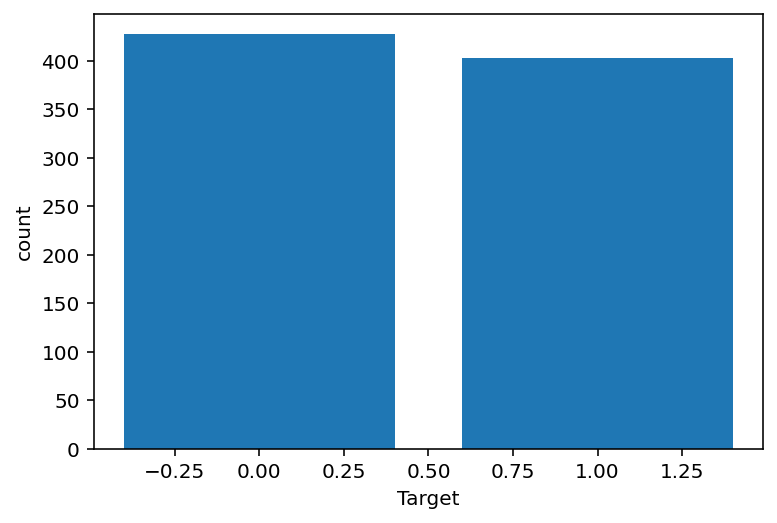

In [35]:
# Code here please
#df.groupby('Target')['Age'].bar()
#plt.bar([1,2,3,4,5,6,7,8],[8,7,6,5,4,3,2,1])
plt.bar([0,1],[427,403])
plt.ylabel('count')
plt.xlabel('Target')


<AxesSubplot:xlabel='Target', ylabel='count'>

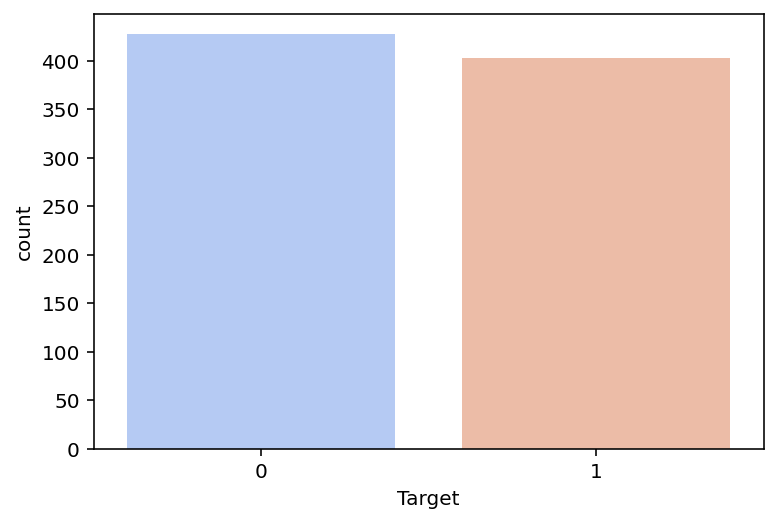

**Re-create the plot below**

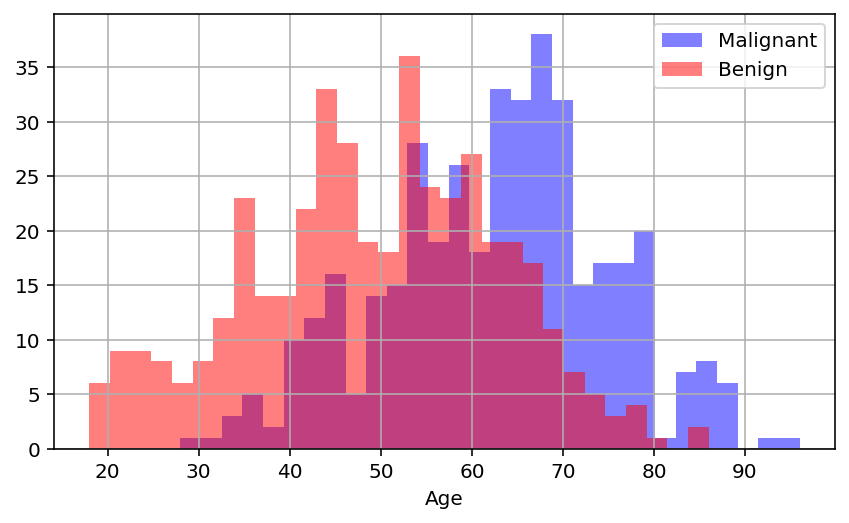

In [121]:
# Code here please
# sns.displot(df, x='Age',hue = 'Target')
# ------------------------------------------------------
d1 = df[df['Target'] == 0]['Age']
d2 = df[df['Target'] ==1]['Age']
plt.figure(figsize=(7,4))
plt.hist(d2,bins=30,alpha=.5,color='blue')
plt.hist(d1, bins = 30, alpha = .5, color='red')
plt.xlabel('Age')
plt.grid()
plt.legend(('Malignant', 'Benign'), loc='upper right')
# Source - Tamera

Text(0.5, 0, 'Age')

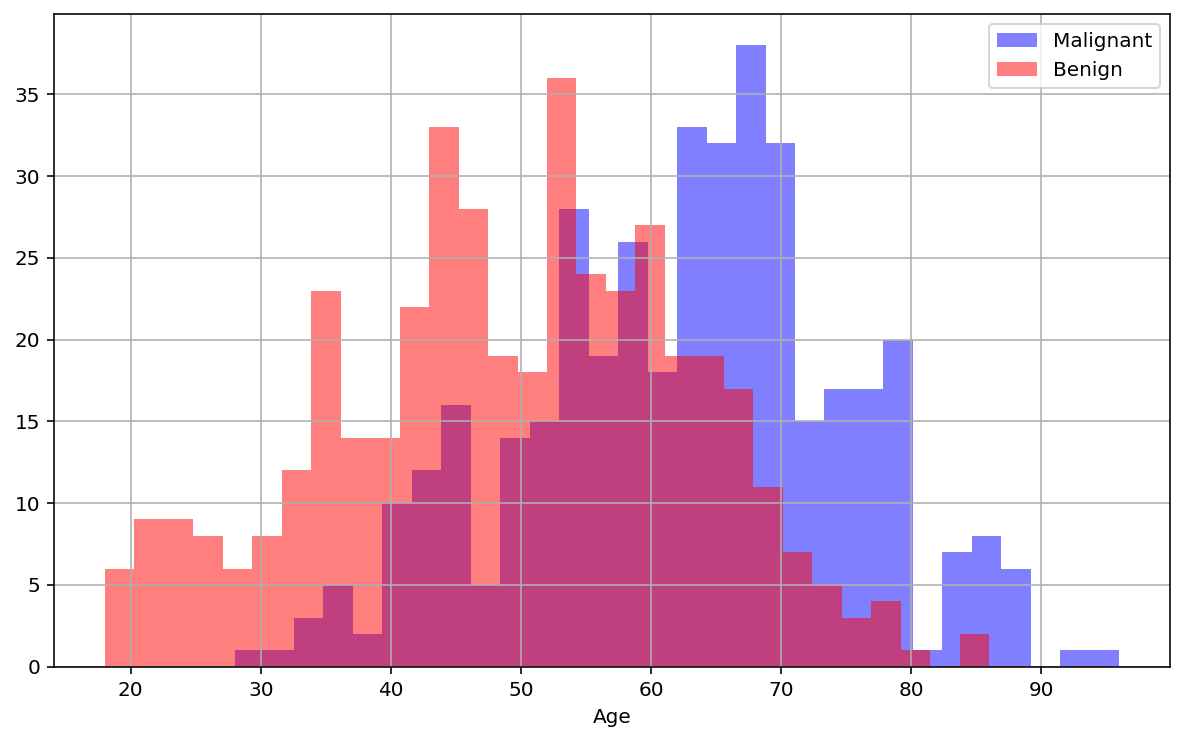

**Do the Train Test Split** using test size 0.3 and random states default value.

In [48]:
df[['Age','Shape','Margin','Density', 'BI-RADS']]

,Age,Shape,Margin,Density,BI-RADS
0,67,3,5,3,5
1,58,4,5,3,5
2,28,1,1,3,4
3,57,1,5,3,5
4,76,1,4,3,5
...,...,...,...,...,...
825,47,2,1,3,4
826,56,4,5,3,4
827,64,4,5,3,4
828,66,4,5,3,5


In [55]:
# Code here please
from sklearn.model_selection import train_test_split
X = df[['Age','Shape','Margin', 'Density', 'BI-RADS']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Decision Tree
**Importing decision tree classifier and create its instance**

In [56]:
# Code here please
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)



**Fit the training data to the model**

In [57]:
# Code here please
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier()

**Do the predistions for your test data and print the results as given below**

In [58]:
# Code here please
predictions = tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       128
           1       0.78      0.81      0.80       121

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



              precision    recall  f1-score   support

           0       0.72      0.80      0.76       133
           1       0.74      0.65      0.69       116

    accuracy                           0.73       249
   macro avg       0.73      0.72      0.72       249
weighted avg       0.73      0.73      0.72       249

[[106  27]
 [ 41  75]]


### Random Forests
**Import Random Forest Classifier and create its instance with 200 no of trees**

In [69]:
# Code here please
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200, random_state=1, n_jobs = -1)

**Fit your training data to Random Forests instance**

In [70]:
# Code here please
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=1)

RandomForestClassifier(n_estimators=200)

**Do the predictions and print results as given belwo**

In [72]:
# Code here please
from sklearn.metrics import accuracy_score
forest_pred = forest.predict(X_test)
accuracy_score(y_test,forest_pred)

0.7670682730923695

In [74]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       128
           1       0.75      0.78      0.76       121

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



In [28]:
# Evaluation


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       133
           1       0.80      0.75      0.77       116

    accuracy                           0.80       249
   macro avg       0.80      0.79      0.79       249
weighted avg       0.80      0.80      0.79       249

[[111  22]
 [ 29  87]]


## To Do:
* Which model is better from the above?
* Plot feature importance for you models, what are your comments?
* Try hyper-parameter tuning using both Randomized and Grid search and see if you can improve your model
* Get `ROC Curves` for your models
* Save your best available model, load it and reproduce the predictions.  

Please refer to the previous lectures for above tasks.<br>
Last but not the least, **Create a comprehensive report on your data analysis and how your model can help in predicting the cancer to save unnecessary biopsies.**

In [ ]:
Based on the metrics, the decision tree gave me a higher accuracy rate compared to random forest.

In [126]:
def feature_plot(coef,columns,y_title='coefficients'):
    feature_imp = pd.DataFrame(coef.T,columns = ['importance'])
    feature_imp['feature'] = columns
    feature_imp.sort_values(by=['importance'],ascending=False, inplace=True)
    feature_imp.plot(x='feature',kind='bar', figsize=(16,4))
    plt.title(y_title)
    plt.ylabel(y_title)
feature_names = df.columns[:-1]
feature_names

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density'], dtype='object')

In [127]:
tree.feature_importances_


array([0.16254238, 0.02822541, 0.11446438, 0.01687362, 0.67789421])

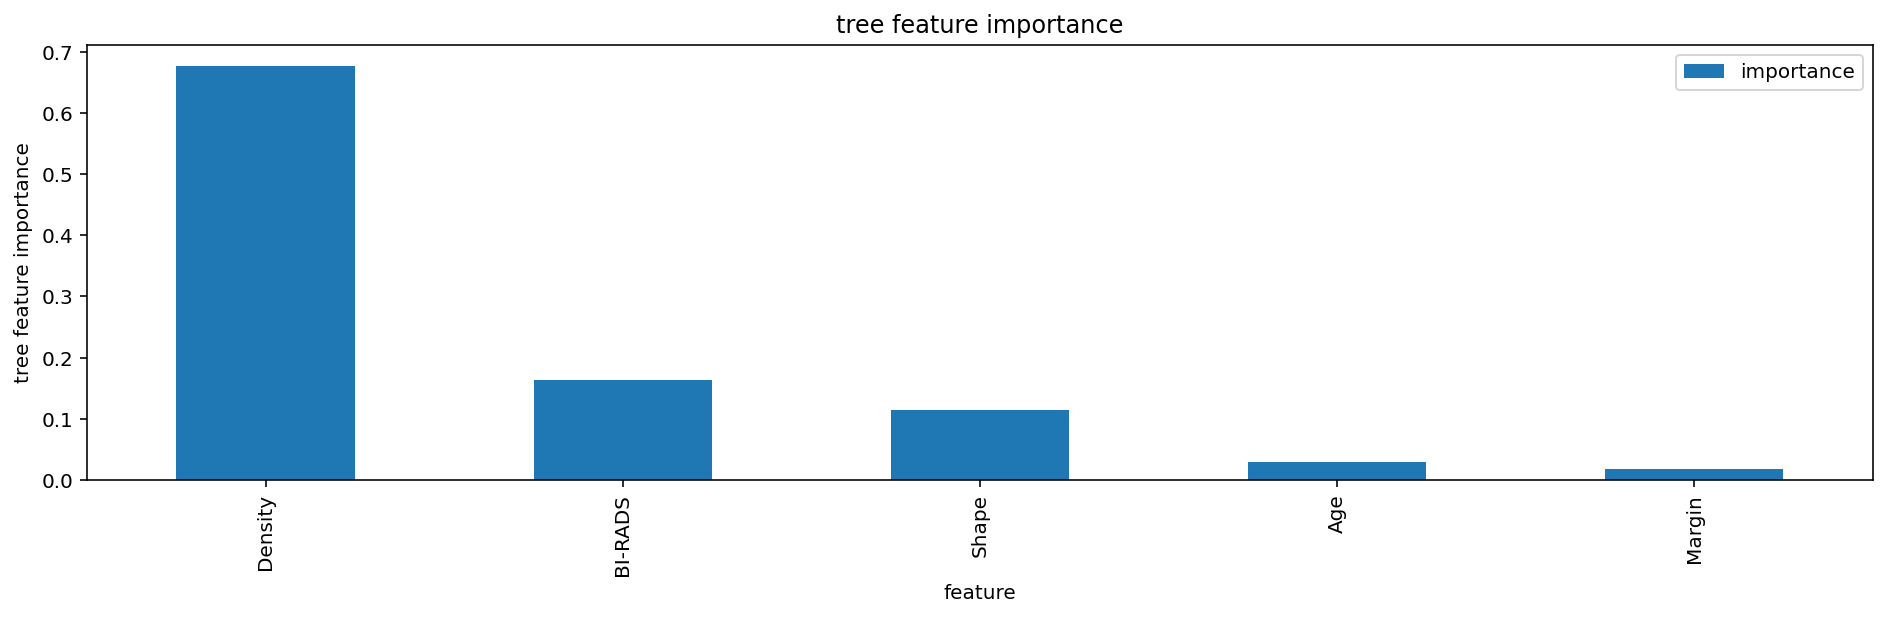

In [128]:
feature_plot(coef = tree.feature_importances_, columns=feature_names,y_title='tree feature importance')

In [ ]:
That density looks like it is important to the tree model.

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from time import time

rfc_RS = RandomForestClassifier(n_estimators=20)
param_distributions = {"max_depth": [2, 3],
                       "max_features": randint(1, 13),
                       "min_samples_split": randint(2, 13),
                       "criterion": ["gini", "entropy"]}
n_iter_search = 15 
random_search_rfc = RandomizedSearchCV(rfc_RS, param_distributions=param_distributions, n_iter=n_iter_search, cv=5)
start = time() 
random_search_rfc.fit(X_train, y_train) 

print("RandomizedSearchCV took {} seconds for {} iterations of searches on given parameter settings.".format(
    round((time() - start),2), n_iter_search))
random_search_rfc.best_score_ 
random_search_rfc.best_estimator_ 
random_search_rfc.best_params_ 
type(random_search_rfc.cv_results_) 
random_search_rfc.cv_results_.keys()

def print_report(search_results, top_n = 2): 
    for i in range(1, top_n + 1):
        rank = np.flatnonzero(search_results['rank_test_score'] == i)

        for val in rank:
            print("Model rank: ", i)
            print("Mean validation score: {:.3f}".format(search_results['mean_test_score'][val]))
            print("std_test_score: {:.3f}".format(search_results['std_test_score'][val]))
            print("Parameters: {}\n".format(format(search_results['params'][val])))
            
print_report(random_search_rfc.cv_results_, 3)
random_search_rfc_pred = random_search_rfc.predict(X_test)

print(classification_report(y_test, random_search_rfc_pred))

rfc_GS = RandomForestClassifier(n_estimators=20)
param_grid = {"max_depth": [2, 3],
              "max_features": [3, 5, 13],
              "min_samples_split": [2, 3, 13],
              "criterion": ["gini", "entropy"]}

grid_search_rfc = GridSearchCV(rfc_GS, param_grid=param_grid, cv=5)#, iid=False)
start = time()
grid_search_rfc.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_rfc.cv_results_['params'])))
print("Best score:", round((grid_search_rfc.best_score_),3))
print("Best params:", grid_search_rfc.best_params_)

grid_search_rfc_pred = grid_search_rfc.predict(X_test)
print(classification_report(y_test, grid_search_rfc_pred))


rfc_prob = forest.predict_proba(X_test)
random_search_rfc_prob = random_search_rfc.predict_proba(X_test)
grid_search_rfc_prob = grid_search_rfc.predict_proba(X_test)

ROC_area_rfc = roc_auc_score(y_test, rfc_prob[:,1]) 
ROC_area_random_search_rfc = roc_auc_score(y_test, random_search_rfc_prob[:,1]) 
ROC_area_grid_search_rfc = roc_auc_score(y_test, grid_search_rfc_prob[:,1]) 

print('Area Under Random Forests ROC Curve: %.3f' % ROC_area_rfc)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search_rfc)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search_rfc)

RandomizedSearchCV took 1.22 seconds for 15 iterations of searches on given parameter settings.
Model rank:  1
Mean validation score: 0.847
std_test_score: 0.020
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 12}

Model rank:  2
Mean validation score: 0.842
std_test_score: 0.026
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 4, 'min_samples_split': 12}

Model rank:  3
Mean validation score: 0.840
std_test_score: 0.009
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       128
           1       0.85      0.77      0.81       121

    accuracy                           0.82       249
   macro avg       0.83      0.82      0.82       249
weighted avg       0.83      0.82      0.82       249

GridSearchCV took 3.94 seconds for 36 candidate parameter settings.
Best score: 0.852
Best p

In [137]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    ax.legend();

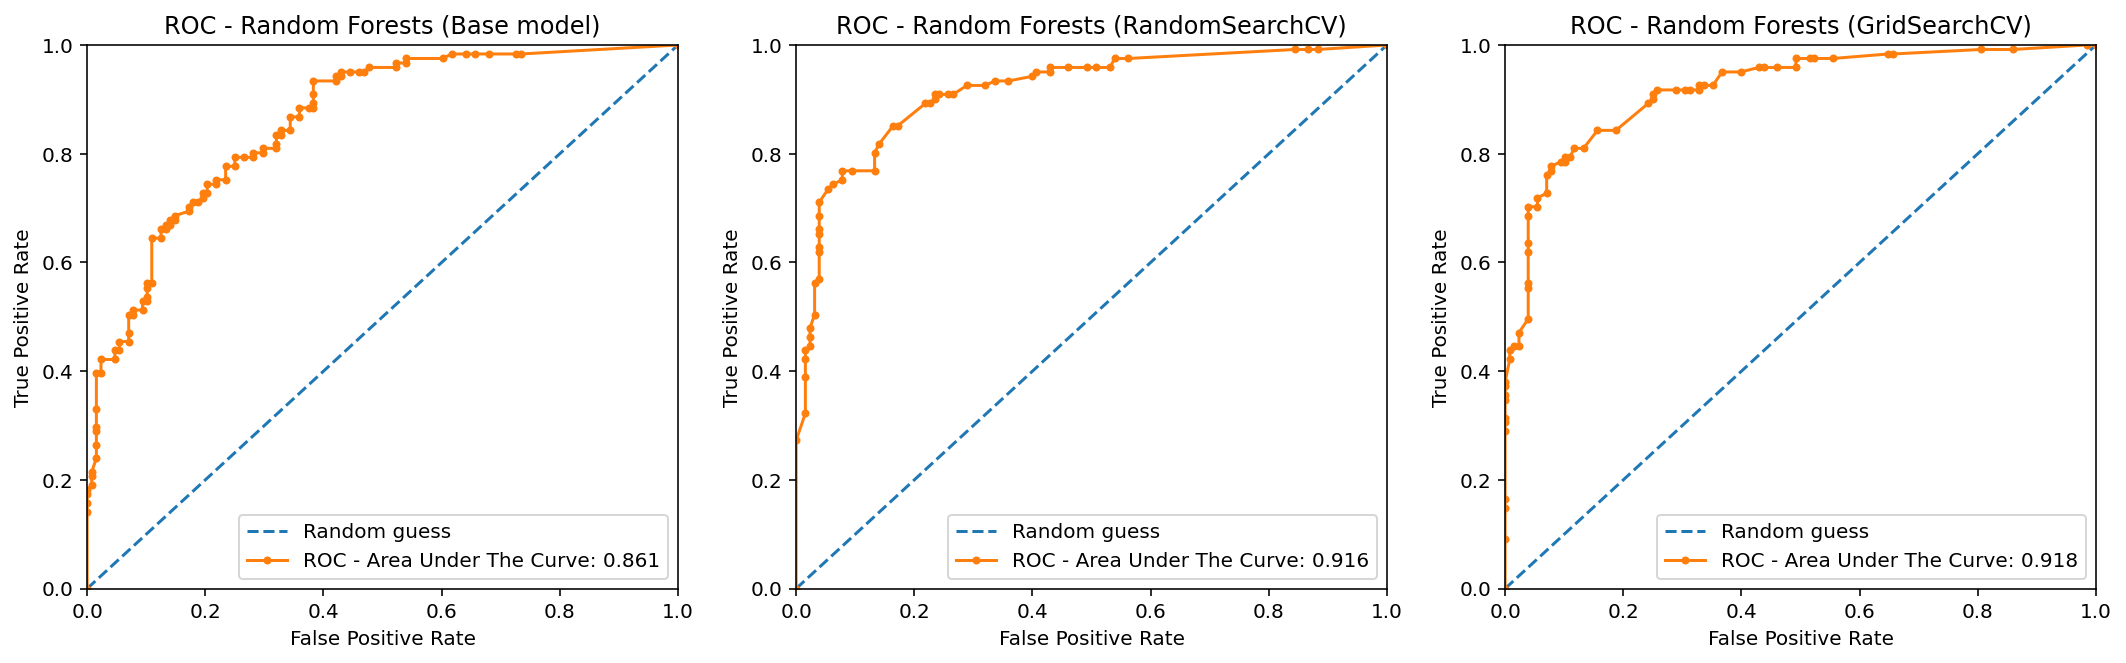

In [138]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

plot_rocs(y_test, rfc_prob, ROC_area_rfc, 
          ax[0], 'ROC - Random Forests (Base model)')

plot_rocs(y_test, random_search_rfc_prob, ROC_area_random_search_rfc,
          ax[1], 'ROC - Random Forests (RandomSearchCV)')

plot_rocs(y_test, grid_search_rfc_prob, ROC_area_grid_search_rfc, 
          ax[2], 'ROC - Random Forests (GridSearchCV)')

In [91]:
import pickle
pickle.dump(tree,open("savedTreeModel.sav",'wb'))

In [92]:
loaded_model = pickle.load(open('savedTreeModel.sav','rb'))

In [96]:
new_pred = loaded_model.score(X_test,y_test)
new_pred

0.7991967871485943

In [98]:
old_pred = tree.score(X_test,y_test)
old_pred

0.7991967871485943

## Good luck!

# Extra Reading and resources: 

* [**Data Science from Scratch -- Part 1: Advance Analytics**](https://leanpub.com/data-science-from-scratch)

* [**Data Science from Scratch -- Part 2: Business Machine Learning**](https://leanpub.com/datascience-from-scratch-p2-business-machine-learning/c/r1W4Bml3Zqr6)


## License

Author: [___Dr. Junaid Qazi___](https://www.linkedin.com/in/jqazi/)<br>
Twitter: [***@JunaidSQazi***](https://twitter.com/JunaidSQazi)

Copyright 2021

Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0) (the "License").<br>you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

*Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Please see the License for the specific language governing permissions and limitations under the License.*


*This is not an official product but sample code provided for an educational purpose.*

***Acknowledgement is requested***